## Lab Session 3

## Basics working with data

In this notebook we will practice the following "data science" steps:
1. Handeling of missing values.
2. Visualising the data.
3. Learning insights from you data.

We will not give a complete course in Python, but will expect you to do some self-study. 
The idea is that you will fill in the answers in this notebook, save it, and upload to to Black Board before the deadline.

In [15]:
import pandas as pd #importing the pandas library
import seaborn as sns #importing seaborn
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Note "%matplotlib inline". This line tells the notebook to put the plot inside the notebook. This is not used in Python scripts which are executed like "normal programs".

<div class="alert alert-block alert-warning">

## Task 1: Seaborn

To illustrate how seaborn plotting works run the following example. Seaborn accesses the columns of a pandas dataframe directly. You only have to specifiy the dataframe and the name of the columns for the plotting axes.

</div>

<Axes: xlabel='index', ylabel='number'>

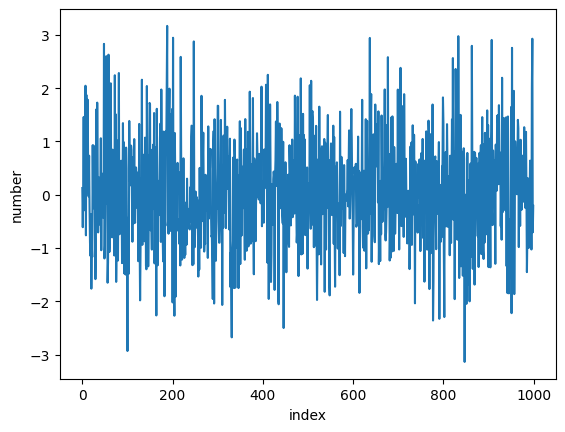

In [16]:
#Generate a random vector sampling from a normal distribution with mean=0, sig=1
#and convert in into a pandas dataframe object
#we call reset_index() on the new dataframe. This adds a new column to our dataframe, 
#which can then be accessed by seaborn to plot the data
df_random = pd.DataFrame(data=np.random.normal(size=1000),columns = ["number"]).reset_index()

#We polot the data with seaborn, specifing x and y axis and the datasource (df_random)
sns.lineplot(x="index",y="number",data=df_random)

<div class="alert alert-block alert-warning">

## Task 2: Loading the data

2.1. Load the titanic dataset ("titanic.csv") contained in this exercise using pandas functions 
into the variable <i>df_titanic</i>.

2.2. The dataset contains missing values. Use the isnull() and sum() method of <i>df_titanic</i> to show which columns have the most missing values.
</div>


In [17]:
#Task 2.1


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

df_titanic=pd.read_csv("titanic.csv")
print(df_titanic.to_string())#read the csv file

      Unnamed: 0    Age            Cabin Embarked      Fare                                                                                Name  Parch  PassengerId  Pclass     Sex  SibSp  Survived              Ticket
0              0  22.00              NaN        S    7.2500                                                             Braund, Mr. Owen Harris      0            1       3    male      1       0.0           A/5 21171
1              1  38.00              C85        C   71.2833                                 Cumings, Mrs. John Bradley (Florence Briggs Thayer)      0            2       1  female      1       1.0            PC 17599
2              2  26.00              NaN        S    7.9250                                                              Heikkinen, Miss. Laina      0            3       3  female      0       1.0    STON/O2. 3101282
3              3  35.00             C123        S   53.1000                                        Futrelle, Mrs. Jacques Heath (Lil

In [18]:
#Task 2.2

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

df_titanic=pd.read_csv("titanic.csv")
print(df_titanic.to_string())#read the csv file

df_titanic_null=df_titanic.isnull()
print(df_titanic_null.to_string())#print the data in csv file

df_titanic_null_sum=df_titanic_null.sum()
df_titanic_info=df_titanic.info()
print(df_titanic_info)
print(df_titanic_null_sum)#print the null sum



      Unnamed: 0    Age            Cabin Embarked      Fare                                                                                Name  Parch  PassengerId  Pclass     Sex  SibSp  Survived              Ticket
0              0  22.00              NaN        S    7.2500                                                             Braund, Mr. Owen Harris      0            1       3    male      1       0.0           A/5 21171
1              1  38.00              C85        C   71.2833                                 Cumings, Mrs. John Bradley (Florence Briggs Thayer)      0            2       1  female      1       1.0            PC 17599
2              2  26.00              NaN        S    7.9250                                                              Heikkinen, Miss. Laina      0            3       3  female      0       1.0    STON/O2. 3101282
3              3  35.00             C123        S   53.1000                                        Futrelle, Mrs. Jacques Heath (Lil

<div class="alert alert-block alert-warning">

## Task 3: Imputing missing values

Three columns have missing values the most: "Age", "Cabin", and "Survived". 
Cabin misses approx. 80% of its values and is not the right candidate for simple imputation approaches.
We focus on the <strong>Age</strong> column, where about 20% of the entries are missing.

3.1. Use the <strong>fillna()</strong> method and only impute the <strong>Age</strong> column with the mean age value(see <strong>mean()</strong> method). Save the result in a new column called "Age_imp_mean".

3.2. Use the method parameter <b>method="ffill"</b> of the <b>fillna()</b> method to fill missing values with a preceding value. Save the result in a new collumn called "Age_imp_ffill".

3.3 Plot histogramms of both columns using seaborn, with parameters <b>hist=True</b>, <b>kde=False</b> and <b>bins=40</b>. Also plot the <strong>Age</strong> column for comparision (use the dropna() to avoid errors). Put everything into one plot.

3.4 Plot boxplots of all three columns. Here we want to use seaborn's boxplot function with the <strong>data=</strong> parameter.

3.5 Explain what the different parts of the boxplot are:
* Horizontal line whitin the colored area
* Width of the colored area
* With of the Area between the two horizontal lines below and above the colored area ("whiskers")
* Dots or points above and below the wiskers.

3.6 Explain what effect each imputation strategy had:
* Using the histogramm - When we analyse the survival of patients with a specific age, lets say the ages close to the mean. Can we trust that the mean survial rate is accurate for that age bracket? Why or why not?
    
* Using the boxplot - When we want to find outliers in regards to age, what method would yield more passengers? Why is that the case? (hint: How is an outlier defined in (seaborn) box-plots?).
</div>


In [19]:
#Task 3.1
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

df_titanic=pd.read_csv("titanic.csv")
df_titanic["Age_imp_mean"]=df_titanic["Age"]

df_titanic["Age_imp_mean"]=df_titanic["Age_imp_mean"].fillna(value=df_titanic["Age"].mean())
print(df_titanic.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1309 non-null   int64  
 1   Age           1046 non-null   float64
 2   Cabin         295 non-null    object 
 3   Embarked      1307 non-null   object 
 4   Fare          1308 non-null   float64
 5   Name          1309 non-null   object 
 6   Parch         1309 non-null   int64  
 7   PassengerId   1309 non-null   int64  
 8   Pclass        1309 non-null   int64  
 9   Sex           1309 non-null   object 
 10  SibSp         1309 non-null   int64  
 11  Survived      891 non-null    float64
 12  Ticket        1309 non-null   object 
 13  Age_imp_mean  1309 non-null   float64
dtypes: float64(4), int64(5), object(5)
memory usage: 143.3+ KB
None


In [20]:
#Task 3.2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

df_titanic=pd.read_csv("titanic.csv")
df_titanic["Age_imp_mean"]=df_titanic["Age"]
df_titanic["Age_imp_mean"]=df_titanic["Age_imp_mean"].fillna(value=df_titanic["Age"].mean())
df_titanic["Age_imp_ffill"]=df_titanic["Age"]
df_titanic["Age_imp_ffill"]=df_titanic["Age_imp_ffill"].ffill()
print(df_titanic.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1309 non-null   int64  
 1   Age            1046 non-null   float64
 2   Cabin          295 non-null    object 
 3   Embarked       1307 non-null   object 
 4   Fare           1308 non-null   float64
 5   Name           1309 non-null   object 
 6   Parch          1309 non-null   int64  
 7   PassengerId    1309 non-null   int64  
 8   Pclass         1309 non-null   int64  
 9   Sex            1309 non-null   object 
 10  SibSp          1309 non-null   int64  
 11  Survived       891 non-null    float64
 12  Ticket         1309 non-null   object 
 13  Age_imp_mean   1309 non-null   float64
 14  Age_imp_ffill  1309 non-null   float64
dtypes: float64(5), int64(5), object(5)
memory usage: 153.5+ KB
None


      Unnamed: 0   Age Cabin Embarked      Fare  \
0              0  22.0   NaN        S    7.2500   
1              1  38.0   C85        C   71.2833   
2              2  26.0   NaN        S    7.9250   
3              3  35.0  C123        S   53.1000   
4              4  35.0   NaN        S    8.0500   
...          ...   ...   ...      ...       ...   
1304         413   NaN   NaN        S    8.0500   
1305         414  39.0  C105        C  108.9000   
1306         415  38.5   NaN        S    7.2500   
1307         416   NaN   NaN        S    8.0500   
1308         417   NaN   NaN        C   22.3583   

                                                   Name  Parch  PassengerId  \
0                               Braund, Mr. Owen Harris      0            1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                                Heikkinen, Miss. Laina      0            3   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)      0         

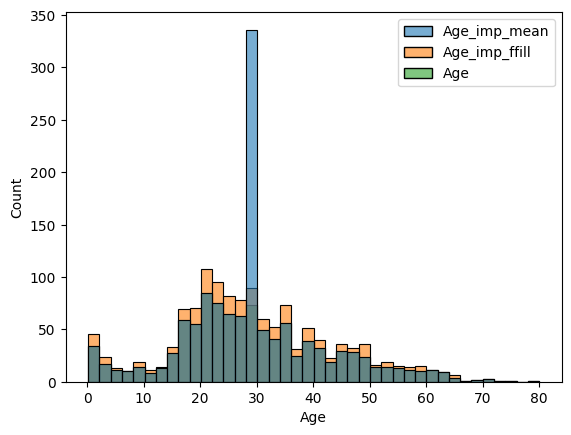

In [21]:
#Task 3.3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

df_titanic=pd.read_csv("titanic.csv")

df_titanic["Age_imp_mean"]=df_titanic["Age"]

df_titanic["Age_imp_mean"]=df_titanic["Age_imp_mean"].fillna(value=df_titanic["Age"].mean())

df_titanic["Age_imp_ffill"]=df_titanic["Age"]
df_titanic["Age_imp_ffill"]=df_titanic["Age_imp_ffill"].ffill()

print(df_titanic)
klist={"Age_imp_mean":[],"Age_imp_ffill":[],"Age":[]}
klist["Age_imp_mean"]=df_titanic["Age_imp_mean"]
klist["Age_imp_ffill"]=df_titanic["Age_imp_ffill"]
klist["Age"]=df_titanic["Age"].dropna()

df_Klist=pd.DataFrame(data=klist)

"""
sns.histplot(df_Klist["Age_imp_mean"], kde=False, bins=40, label="Age_imp_mean", color="blue")
sns.histplot(df_Klist["Age_imp_ffill"], kde=False, bins=40, label="Age_imp_ffill", color="green")
sns.histplot(df_Klist["Age"].dropna(), kde=False, bins=40, label="Age", color="red")
plt.legend()
"""
sns.histplot(data=df_Klist,kde=False,bins=40,alpha=0.6)
plt.xlabel("Age")
plt.show()
#histplot defaultly generate hitograms so it's don't have hist parameter



      Unnamed: 0   Age Cabin Embarked      Fare  \
0              0  22.0   NaN        S    7.2500   
1              1  38.0   C85        C   71.2833   
2              2  26.0   NaN        S    7.9250   
3              3  35.0  C123        S   53.1000   
4              4  35.0   NaN        S    8.0500   
...          ...   ...   ...      ...       ...   
1304         413   NaN   NaN        S    8.0500   
1305         414  39.0  C105        C  108.9000   
1306         415  38.5   NaN        S    7.2500   
1307         416   NaN   NaN        S    8.0500   
1308         417   NaN   NaN        C   22.3583   

                                                   Name  Parch  PassengerId  \
0                               Braund, Mr. Owen Harris      0            1   
1     Cumings, Mrs. John Bradley (Florence Briggs Th...      0            2   
2                                Heikkinen, Miss. Laina      0            3   
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)      0         

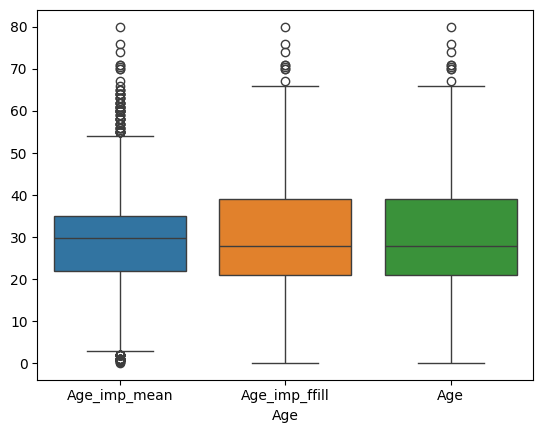

In [22]:
#Task 3.4
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

df_titanic=pd.read_csv("titanic.csv")

df_titanic["Age_imp_mean"]=df_titanic["Age"]

df_titanic["Age_imp_mean"]=df_titanic["Age_imp_mean"].fillna(value=df_titanic["Age"].mean())

df_titanic["Age_imp_ffill"]=df_titanic["Age"]
df_titanic["Age_imp_ffill"]=df_titanic["Age_imp_ffill"].ffill()

print(df_titanic)
klist={"Age_imp_mean":[],"Age_imp_ffill":[],"Age":[]}
klist["Age_imp_mean"]=df_titanic["Age_imp_mean"]
klist["Age_imp_ffill"]=df_titanic["Age_imp_ffill"]
klist["Age"]=df_titanic["Age"].dropna()

df_Klist=pd.DataFrame(data=klist)



sns.boxplot(df_Klist)
plt.xlabel("Age")
plt.show()

#Task 3.5

Horizontal line within the colored area:
Line that separates the data 50/50 50 above and 50 below this line represents the middle value of the data when they were sorted.

Width of the colored area:
This area called (IQR) this area represents where is the most of the data are gathered/clustered larger part (Horizontal line as the dividing line) represent Q3 and smaller part represents the Q1 (Q3=75% and Q1=25%)
With of the Area between the two horizontal lines below and above the colored area ("whiskers"):
They were the data that are spread around the colored area they were get as the normal (typical data) they were spread/extend 1.5 times like IQR below Q1 and above Q3

Dots or points above and below the wiskers :
They were the outliers that too far out of normal data range (abnormal data)  any point that far from 1.5 times of IQR  space are outlier (data) 

#Task 3.6

Using the histogramm - 
Missing data value: if there is much more missing data in specific column in this case age close to the mean value refilling it with mean value of age might not provide the true situation.
Data smoothing: this is similar to Missing data the difference is just it may be any kind of data value not specifically average data value (just like refilling a damage photo using one background color in photoshop) it make everything more orderly but it hide the real situation (lets say the real photo might hiding a deep mystery but filling it make it disappear)
In this case small sample size might not be a problem when we take the “Age” column because it’s only missing 20% of it’s data but if take cabin value 80% might make a problem it is like ( there is a class room there should be a 20 children but there is only one child present now so we use the one child mark as the average value of whole class and fill everyone’s report card with his mark )
If we look at this all three descriptions it’s point to the same problem WE CAN’T REPRESENT (FILL) EVERYTHING (NULL) WITH ONE VALUE BECAUSE THAT MIGHT MAKE THE DATA STUCTURE MISLEADING AND WE MIGHT MAKE WRONG PREDICTIONS BECAUSE OF THIS.


Using the boxplot - 
Original Data: this data set only have original data points without any adjustments (filling or smoothing) so this will show the true situation and most outliers count( very young or very old)  because data are wildly spread and null values the  outliers are high
But when it comes to Age_imp_mean , Age_imp_ffil the outliers might be turn into typical data hiding them ( masking the true situation) because we filling null values ( those filled data might be not the genuine outliers) with constant value this will smooth the data and reduce the appearance of extreme ages like old and young ( we can see this in Age_imp_mean and Age_imp_ffil don’t show that any outlier’s in younger ages the boxplot ) 


<div class="alert alert-block alert-warning">

## Task 4

(from https://www.kaggle.com/c/titanic) The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This tragedy shocked the international community and led to better safety regulations for ships. One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others... let's see if we can figure out which ones.


First lets explore the data a bit further:
* 4.1 Use the <strong>relplot()</strong> function in pandas to make a scatterplot of "Fare" vs. "Age", colored by "Survived" (hue parameter) and split by "Sex"(col parameter). Is Age correlated with Fare? Do passengers who pay more have a better chance of survival? Is that always true?

* 4.2 Plot "Pclass" vs. "Fare" colored by Sex using a boxplot. Anything unusual besides higher fares for higher classes?

* 4.3 How is the survival rate of passengers(colored by "Sex") in the different classes ("Pclass")? Make a barplot.

</div>

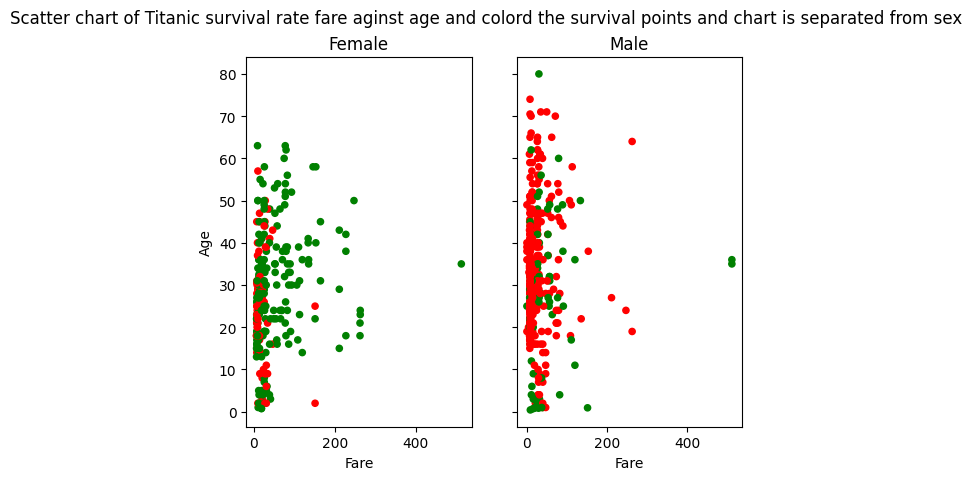

In [23]:
#Task 4.1
import pandas as pd
import random as rd
import seaborn as se
import matplotlib.pyplot as plt
%matplotlib inline


pd_titanic=pd.read_csv("titanic.csv")

pd_titanic_clean=pd_titanic.dropna(subset=['Survived',  'Sex'])
colors=pd_titanic_clean["Survived"].map({0:'red',1:'green'})


fig, axes=plt.subplots(1,2,figsize=(6.4,4.8),sharey=True)

pd_titanic_clean[pd_titanic_clean["Sex"]=="female"].plot.scatter(
    x="Fare",
    y="Age",
    c=colors[pd_titanic_clean["Sex"]=="female"],
    ax=axes[0],
    title="Female"
)

pd_titanic_clean[pd_titanic_clean["Sex"]=="male"].plot.scatter(
    x="Fare",
    y="Age",
    c=colors[pd_titanic_clean["Sex"]=="male"],
    ax=axes[1],
    title="Male"
)
fig.suptitle("Scatter chart of Titanic survival rate fare aginst age and colord the survival points and chart is separated from sex")
plt.show()
#pandas dont have replot() so I create one answer from pandas and another one from seaborn it's down

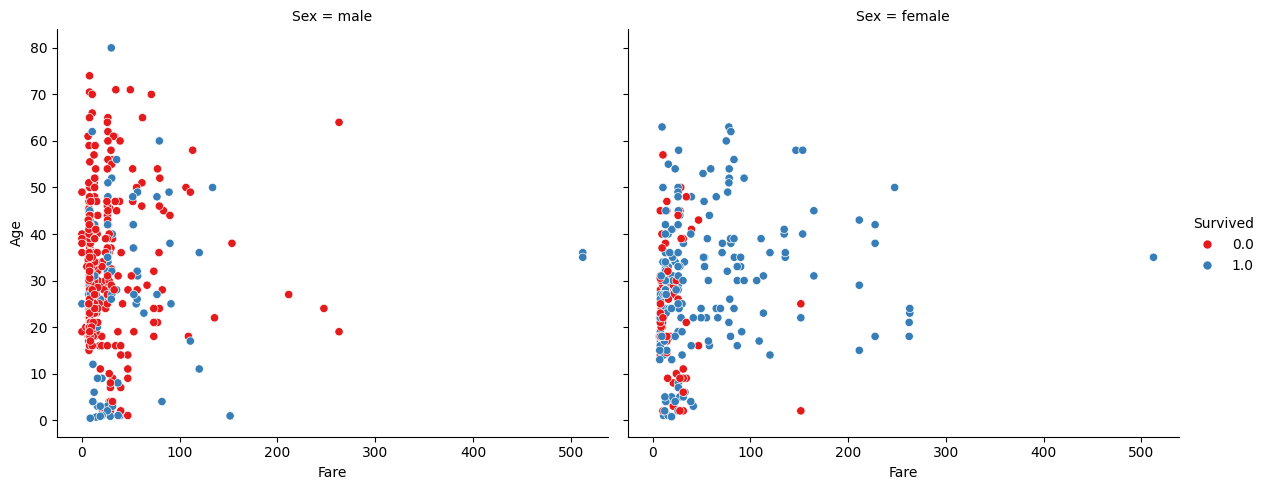

In [24]:
#Task 4.1 Second answer:
import pandas as pd
import random as rd
import seaborn as se
import matplotlib.pyplot as plt
%matplotlib inline


pd_titanic=pd.read_csv("titanic.csv")

pd_titanic_clean=pd_titanic.dropna(subset=['Survived',  'Sex'])

se.relplot(data=pd_titanic_clean,x="Fare",y="Age",hue="Survived",col="Sex",height=5,aspect=1.2,palette="Set1")
plt.show()

#Task 4.1 Second answer:

In this chart, we dropped all the data that was null in  Sex, and most importantly Survived we did this because if we going to check the survival rate according to age and Fare we going add the data point of Survived to the chart and survived only have two types of data one is 0,1 (0=failed to survive,1=survived) if we going to use fillna() or ffill() to fill those values we have to choose between two values survived or failed to survive in this case if we choose even one of them it will change the whole representation of the data ( it will make out data set flawed because we don’t have large enough range to choose example we can use avg: age because age has a bigger range like 10,20,30….40 but in here we have no choice like this) afterward we want the analysis of survival rate according to fractures like ( Sex) we don’t need them as well because if they have null value that also can effect data sex also have only two male or female and just like described before(and we don’t need to be bias for one sex) it can negatively affect the chart. We don’t need to remove null value from age and fare because we only need the range, not the actual data itself from those two key sets

No. According to this chart Fare(high paying does not affect the survival of a person we can see a lot of surviving people are young and low-paying people. we can see there are only two maxprice(500) people who survived from males according to the Male chart and only one high-paying woman who survived according to the female chart and the women's survival rate is higher than the men's survival rate we can see a large number of women who survived who paid medium amount (age below 60)of fair in women's chart midprice(100-300) This is compared to male chart higher amount because in the male chart only 5 people who manage to survive and all of them are below 60 and 3 of them are below 30. most of the surviving people seem to be either kids or females there might be other factors affecting this like if most of the passengers were males the large loss of male survival rate might be described and we can say children also didn’t have to pay the full Fare so we can explain the cluster of surviving people in low age areas (below 10) in both charts. 


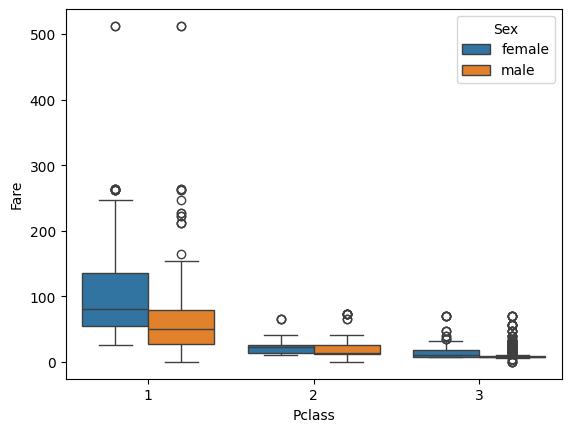

In [25]:
#Task 4.2
import pandas as pd
import random as rd
import seaborn as se
import matplotlib.pyplot as plt
%matplotlib inline


pd_titanic=pd.read_csv("titanic.csv")
titanic_dic={"Pclass":pd_titanic["Pclass"],"Fare":pd_titanic["Fare"],"Sex":pd_titanic["Sex"]}


titanic_dic_cp=pd.DataFrame(titanic_dic)

se.boxplot(x="Pclass",y="Fare",hue="Sex",data=titanic_dic_cp)
plt.show()

#Task 4.2

Females' Fare is higher than males' Fare (females had paid more than males)

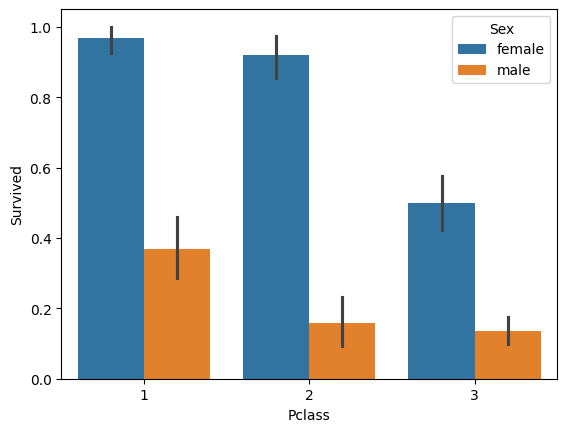

In [26]:
#Task 4.3
import pandas as pd
import random as rd
import seaborn as se
import matplotlib.pyplot as plt
%matplotlib inline


pd_titanic=pd.read_csv("titanic.csv")

se.barplot(data=pd_titanic,x="Pclass",y="Survived",hue="Sex")
plt.show()

#Task 4.3

In all the classes females manage to survive the most (female in the first class have the highest survival rate) 

<div class="alert alert-block alert-warning">

## Task 5


Survival seems to be correlated with the passenger class. Looking at the plot of Task 4.3, something is unusual about the survival rate of female passengers in the third class. But first, lets look at the survival rate of children, passengers under the age of 14.

* 5.1 Plot Pclass vs Survived using a <strong>barplot()</strong> for passengers under the age of 14. Color by "Sex". What do you see?
* 5.2 Plot Pclass vs Survived using a <strong>barplot()</strong> for passengers abover or equal the age of 14. Color by "Sex". What do you see?
* 5.3 Plot number of male and female children in each class using <strong>countplot()</strong>.
* 5.4 Given this three points of information, did "Women and children first" also apply to the third class? If so, why do you think female passengers (all ages) hat a much lower survival rate then in other classes? Hint: Think about the number of available life boats and where are the lower class decks located?

</div>

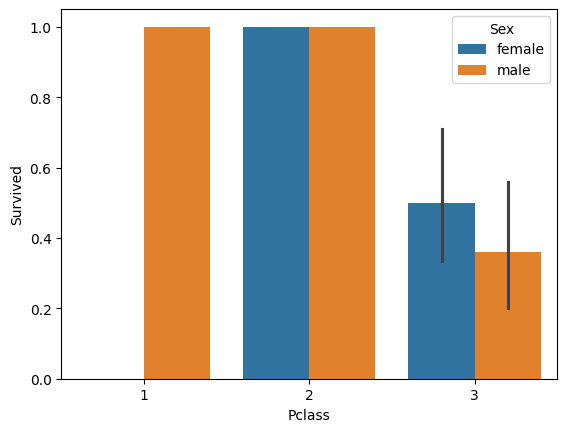

In [27]:
#Task 5.1
import pandas as pd
import seaborn as se
import matplotlib.pyplot as plt
%matplotlib inline


pd_titanic=pd.read_csv("titanic.csv")
age_group=pd_titanic[pd_titanic["Age"]<14]

se.barplot(x="Pclass",y="Survived",hue="Sex",data=age_group)
plt.show()

#Task 5.1

First-class: All the males survived and there are no female survivors 
Second class: both males and females completely survived and there is no mean value variation (error rate) 
Third class: Females survived the most but both females and males have Higer variation of the mean value of survival rate (error rate) 


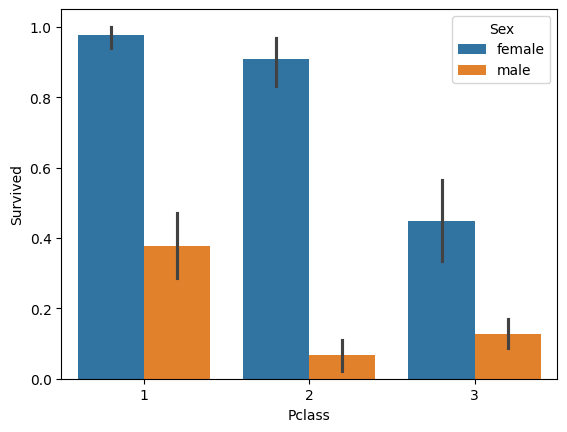

In [28]:
#Task 5.2
import pandas as pd
import seaborn as se
import matplotlib.pyplot as plt
%matplotlib inline

pd_titanic=pd.read_csv("titanic.csv")

age_ajusted=pd_titanic[pd_titanic["Age"]>=14]

se.barplot(data=age_ajusted,x="Pclass",hue="Sex",y="Survived")
plt.show()

#Task 5.2

First-class: females are survived more than males and they have vey low level of mean value calculation error/variation. Males have very low level of survival rate and higher level of mean value calculation error /variation.

Second class: females are survived the most but they have slightly higher level of mean value calculation error /variation (compare to first class females).Males have very low level of survival rate and their mean value calculation error/variation is high.
Third class: females are survived the most, but they have higher level of mean value calculation error variation (compare to first class females and second-class females it is like first class variation <second class variation <third class variation). Males’ survival rate is low compared to females but it is better than the second-class male survival rate but lower than the first-class male survival rate.

Other things to consider:
All over the chart females survived the most but their variation/error rates also became bigger along with the class 1<2<3.
Males have a low survival rate all over the class compared to females and first-class males survived the most but they have higher variation/error (when it comes to calculating mean value compared to both second and third-class males) and second-class males have the lowest survival rate when compare to both male and females and there variation/error is slightly better than first-class males but still worse than third class males. Third-class males have a better survival rate than second-class males but not better than first-class males and they have the lowest variation/error level.

Males Variation/error (when calculating mean value): 3 class <2 class <1 class

Males Survival:1class >3 class >2 class

Females Variation/error (when calculating mean value): 1 class <2 class <3 class

Females Survival:1class >2 class >3 class

Overall: 
Survival: Female [1class >2 class >3 class] < Male [1class >3 class >2 class]

Variation: 1 class Female < 3 class Male <2 class Female<2 class Males< 1 class Males < 3 class Females


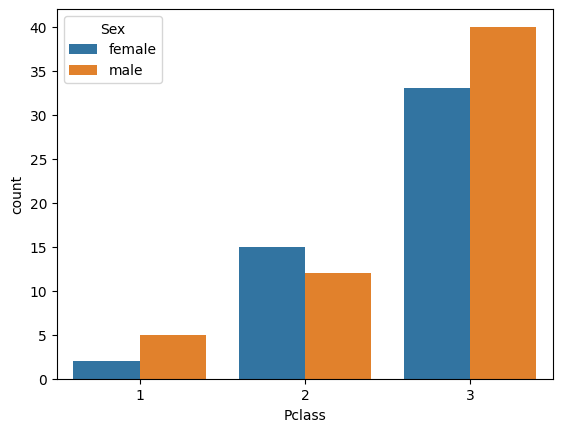

In [29]:
#Task 5.3
import pandas as pd
import seaborn as se
import matplotlib.pyplot as plt
%matplotlib inline

pd_titanic=pd.read_csv("titanic.csv")

age_ajust=pd_titanic[pd_titanic["Age"]<=14]

se.countplot(data=age_ajust,x="Pclass",hue="Sex")
#se.barplot(data=pd_titanic,x="Pclass",y="Fare",hue="Sex")
#se.countplot(data=pd_titanic,x="Pclass",hue="Sex")
plt.show()
#consider 14 is also children

#Task 5.4

“Yes, it does let's take survival the survival rate of females who are equal to or older than 14 in 3rd class compared to males in third class they survived the most if take passengers only in 3rd class (males and females in third class) this is applied to females and males younger than 14 who in 3rd class as well compare to male children who younger than 14 female children again survived the most if take only third class female count as a whole( younger and older (in all ages)) they survived the most compare to males in 3rd class we can see in if we took whole of the passengers in third class there were more  males than females in the third class ( actually most people are live in the 3rd class compare to 1st and 2nd class) but the male survival rate is lower than females in third class so we can see there are more males death compare to females this thing is not related to “WOMEN AND CHILDREN FIRST” it related to each classes passenger count and the place lower class deck located (in most ships they were close to the bottom of the ship) so higher population, rush, panic might effect when they were reaching the life boats because of this there were more casualties among 3rd class passengers.”

Yes, "Women and children first" did apply to third-class passengers too, but the survival rate among female passengers of all ages in third class was considerably lower compared to females in other classes.

Several factors contribute to this:

Access to lifeboats and their location on deck: Because third-class passengers were located on lower decks for the most part beneath the main ones, this put them at a disadvantage in trying to reach lifeboats with greater speed. Chaos and hurried evacuation increased by the physical barriers gates or lack of direct ways to approach lifeboats further lowered their survival rate.

Overcrowding: The third class was much more filled than the first and second classes combined. With a greater population and scarcity of resources, such as lifeboats, it became increasingly difficult to make sure that every life would be accounted for. Even with policy favoring the survival of women and children, the great number of people trying to flee probably led to confusion and delays in the process, which can be related to a decrease in survival rates.

Rates of Survival Based on Genders and Ages: While third-class females did have a higher survival rate than third-class males, the overall survival rate of females in the third class was still less as compared to the females in the upper classes. As expected, female children under 14 years old survived more than their male counterparts in third class. However, considering the higher number of male passengers on board and disadvantages created due to the design of the ship for third-class passengers as a whole, more male casualties occurred.

Therefore, although the rule of "women and children first" was often followed to a technical degree, the inferior locations on decks, overcrowding, and general lack of availability with regard to lifeboats served to make the impact on third-class passengers disproportionately different, with higher overall mortality rates in that group.


<div class="alert alert-block alert-warning">

## Task 6


Most of the lifeboats where on Deck A. Lets investigate the implication for the survival of the passengers.
As we have seen, most of the cabin data is missing. Nonetheless, lets see if we can still extract some information.

6.1 What percentage of Cabin values missing in each Pclass? Use isnull() and value_counts().

It seems the first class only has about 20% missing values! Lets continue our investigation!

* 6.2 Drop all rows with missing Cabin values. Save the result in the variable <i>df_titanic_nona</i>
    
* 6.3 Extract the first letter of each entry in the Cabin column. Save the result in a new column called "Level" in the <i>df_titanic_nona</i> dataframe.
    
* 6.4 Plot Fare by Level using a <strong>barplot()</strong> of the first class passengers. What is the level with the lowest average fare(ignoring level T)? Does that make sense to you given the location?

6.5 What is the survival rate by level? (Lifeboards were located on deck A (prominade deck)). Anything unusual about the average survival rate of deck A?

6.6 What is the ratio of male to female passengers on each deck? Use a barplot to illustrate. Does it explain the survival rate for deck A?
For this exercise you need to compute the number of female and male passagers on each deck and devide by the total number (female+male) of passengers on that deck. You can then plot the resulting dataframe.



</div>

In [30]:
#Task 6.1
import pandas as pd
import seaborn as se
import matplotlib.pyplot as plt
%matplotlib inline


pd_titanic=pd.read_csv("titanic.csv")

Presentage_count=pd_titanic.groupby("Pclass")["Cabin"].apply(lambda x:x.isnull().mean()*100)

for i,j in zip(Presentage_count,[1,2,3]):
    print(f"Pclass{j}:  {i:.3f}%")

print(Presentage_count)

Pclass1:  20.743%
Pclass2:  91.697%
Pclass3:  97.743%
Pclass
1    20.743034
2    91.696751
3    97.743300
Name: Cabin, dtype: float64


In [33]:
#Task 6.2
import pandas as pd
import seaborn as se
import matplotlib.pyplot as plt
%matplotlib inline

pd_titanic=pd.read_csv("titanic.csv")

#answer 1
#df_titanic_nona=pd_titanic["Cabin"].dropna()
#answer 2
df_titanic_nona=pd_titanic.dropna(subset=["Cabin"])
print(df_titanic_nona.info())

<class 'pandas.core.frame.DataFrame'>
Index: 295 entries, 1 to 1305
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   295 non-null    int64  
 1   Age          272 non-null    float64
 2   Cabin        295 non-null    object 
 3   Embarked     293 non-null    object 
 4   Fare         295 non-null    float64
 5   Name         295 non-null    object 
 6   Parch        295 non-null    int64  
 7   PassengerId  295 non-null    int64  
 8   Pclass       295 non-null    int64  
 9   Sex          295 non-null    object 
 10  SibSp        295 non-null    int64  
 11  Survived     204 non-null    float64
 12  Ticket       295 non-null    object 
dtypes: float64(3), int64(5), object(5)
memory usage: 32.3+ KB
None


In [34]:
#Task 6.3
import pandas as pd
import seaborn as se
import matplotlib.pyplot as plt
%matplotlib inline

pd_titanic=pd.read_csv("titanic.csv")
pd_titanic_nona=pd_titanic.dropna(subset=["Cabin"]).copy()
pd_titanic_nona.loc[:,"Level"]=pd_titanic_nona["Cabin"].str[0]


print(pd_titanic_nona[["Level","Cabin"]])

     Level Cabin
1        C   C85
3        C  C123
6        E   E46
10       G    G6
11       C  C103
...    ...   ...
1295     D   D40
1296     D   D38
1298     C   C80
1302     C   C78
1305     C  C105

[295 rows x 2 columns]


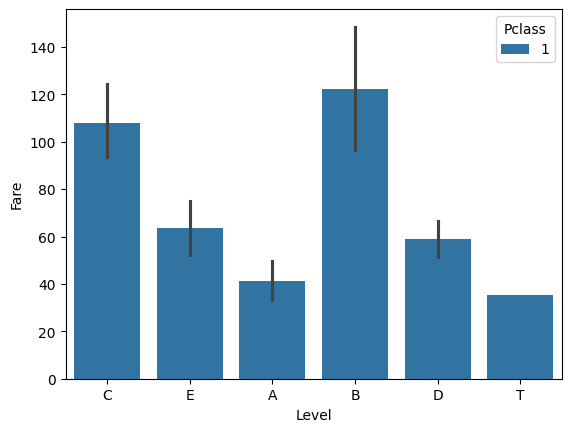

In [35]:
#Task 6.4
import pandas as pd
import seaborn as se
import matplotlib.pyplot as plt
%matplotlib inline

pd_titanic=pd.read_csv("titanic.csv")
pd_titanic_nona=pd_titanic.dropna(subset=["Cabin"]).copy()

pd_titanic_nona.loc[:,"Level"]=pd_titanic_nona["Cabin"].str[0]

Pcl_adjusted=pd_titanic_nona[pd_titanic_nona["Pclass"]==1]

se.barplot(data=Pcl_adjusted,x="Level",y="Fare",hue="Pclass")
plt.show()

#Task 6.4

No, it does not make sense, a level close to the deck has a better chance arrive at lifeboats and amenities compared to lower ones so they should have higher ‘Faire’ values

But we can explain it using several factors:
Special discount for the VIP people: this might be because Level A Cabin might be reserved for politicians, influential people, and people who contribute to the building of the ships like engineers, these people might receive discount fares or free passes. This might explain why some cabins in the level ‘A’ have lower ‘Faires’

Time and Cabin Location: Like when we book plane tickets the people who book earlier might get cheaper Faires while People who book later might get higher Fairs. The location also might contribute to this because cabins closer to noisy places might be cheaper than other cabins.

Data get skewed: because we have to remove 80% from ‘Cabin’ column because they were null values(sample size became smaller)  this might have affected the average fare of level A (skewed by outliers (let's say data skewed by guys who had discounts)) 


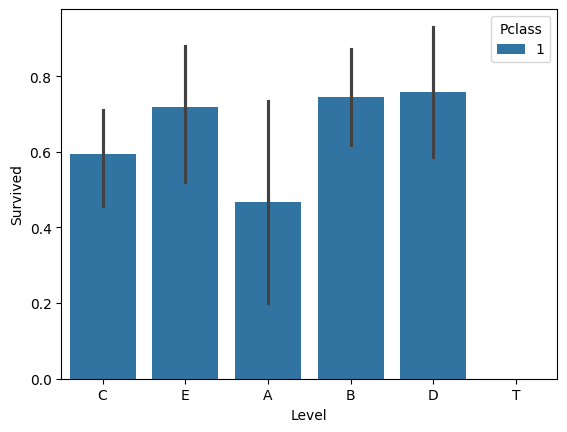

In [36]:
#Task 6.5 
import pandas as pd
import seaborn as se
import matplotlib.pyplot as plt
%matplotlib inline

pd_titanic=pd.read_csv("titanic.csv")

pd_titanic_nona=pd_titanic.dropna(subset="Cabin").copy()
pd_titanic_nona.loc[:,"Level"]=pd_titanic_nona["Cabin"].str[0]

Pcl_adjusted=pd_titanic_nona[pd_titanic_nona["Pclass"]==1]

se.barplot(data=Pcl_adjusted,x="Level",y="Survived",hue="Pclass")
plt.show()


#Task 6.5 

Yes, if lifeboats were located at deck ‘A’ they should have higher survival rates than other decks, but they have the lowest survival rates other than deck T where no one survived. 
Also, deck A has higher mean value calculation error/variation than other decks. So, the average survival rate might be higher or lower than this.


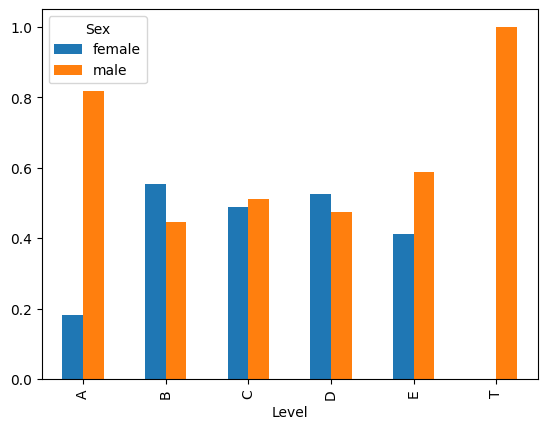

'\naxis=0 operates along rows (column-wise). So it processes each column one by one.\naxis=1 operates along columns (row-wise). So it processes each row one by one, combining\n'

In [37]:
#Task 6.6
import pandas as pd
import seaborn as se
import matplotlib.pyplot as plt

pd_titanic=pd.read_csv("titanic.csv")
pd_titanic_nona=pd_titanic.dropna(subset="Cabin").copy()

pd_titanic_nona.loc[:,"Level"]=pd_titanic_nona["Cabin"].str[0]

Pcl_adjusted=pd_titanic_nona[pd_titanic_nona["Pclass"]==1]

gendercount=Pcl_adjusted.groupby("Level")["Sex"].value_counts().unstack(fill_value=0)

genderratio=gendercount.div(gendercount.sum(axis=1),axis=0)

genderratio.reset_index(inplace=True)

genderratio.plot(x="Level",kind="bar",stacked=False)
plt.ylabel="Proportion"
plt.title="Male and Female Gender ratio"
plt.show()
'''
axis=0 operates along rows (column-wise). So it processes each column one by one.
axis=1 operates along columns (row-wise). So it processes each row one by one, combining
'''
#print(gendercount)
#print(genderratio)

#Task 6.6

These passengers in 1st class Deck ‘A’ (level A) cabins might be ship crew (ship captain, deck hands, ship police, maids…etc) (at least most of them) these individuals might have chosen to stay on the ship or assist others rather than evacuating immediately

Also, there is a higher number of males in the deck ‘A’ compared to Females “because of women and children first” (mention in Question 5.4) males might have given a chance to the females.

So, if we account for these points, the higher number of casualties (low survival) in deck can be explained. 
